In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [2]:
df = pd.read_csv('/content/augmented_data_4.csv')
df

,corrected_tweet,class
0,i must be a bitch you are sike unexampled this...,1
1,wicca gotta team full of dorsum oes,1
2,kanyeshrug low shots be like only great thing ...,1
3,gay negros couldn't wait to act like bitches t...,1
4,pornandroidiphoneipadsexxxx lesbian lesbian gi...,1
...,...,...
9995,these bitches done caqre they just play that role,1
9996,fuck tweaking biqch can you cook,1
9997,slow they fuck down bitch i know where you liv...,1
9998,to feet smell like my puss what like flowers b...,1


In [3]:
x = df['corrected_tweet']
y = df['class']

In [4]:
df['class'].value_counts()

,count
class,
1,7570
2,1990
0,440


In [5]:
all_text = ' '.join(x)
unique_words = set(all_text.split())  # Split and get unique words
print(f"Total unique words in the emotions dataset: {len(unique_words)}")

Total unique words in the emotions dataset: 9790


In [6]:
max_features = 5000
print(f"Max features : {max_features}")

Max features : 5000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify= y_train)

In [8]:
tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [9]:
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='pre', truncating='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='pre', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='pre', truncating='post')

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [13]:
history = model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7530 - loss: 0.6980 - val_accuracy: 0.9006 - val_loss: 0.3907
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9126 - loss: 0.2907 - val_accuracy: 0.9287 - val_loss: 0.1890
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9430 - loss: 0.1668 - val_accuracy: 0.9513 - val_loss: 0.1336
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9492 - loss: 0.1293 - val_accuracy: 0.9481 - val_loss: 0.1175
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9521 - loss: 0.1030 - val_accuracy: 0.9588 - val_loss: 0.0859
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9643 - loss: 0.0745 - val_accuracy: 0.9694 - val_loss: 0.0635
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9834 - loss: 0.0531 - val_accuracy: 0.9862 - val_loss: 0.0484
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9917 - loss: 0.0375 - val_acc

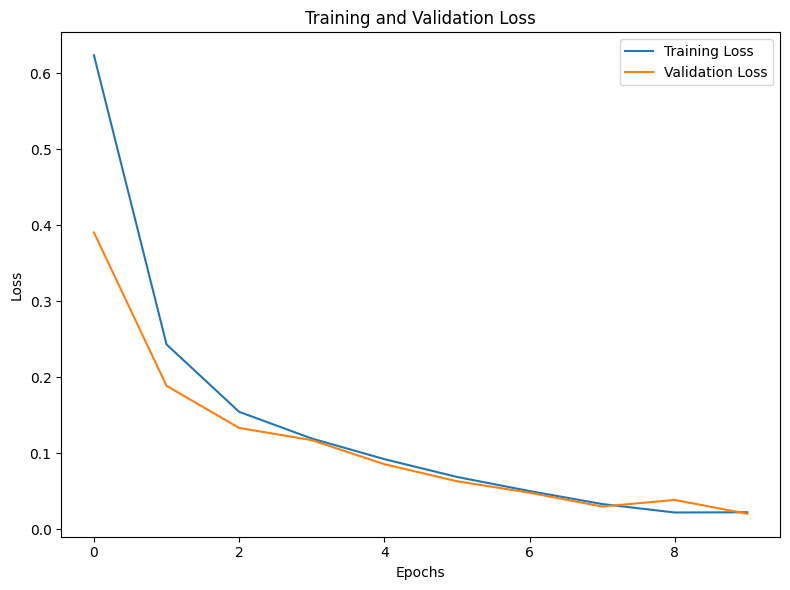

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [16]:
acc_score = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc_score:.4f}")

Test Accuracy: 0.9915


In [17]:
class_names = ["Hate Speech", "Offensive Language", "Neither"]

In [18]:
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report: \n" ,class_report)

Classification Report: 
                     precision    recall  f1-score   support

       Hate Speech       1.00      0.84      0.91        88
Offensive Language       0.99      1.00      1.00      1514
           Neither       0.99      0.99      0.99       398

          accuracy                           0.99      2000
         macro avg       0.99      0.94      0.97      2000
      weighted avg       0.99      0.99      0.99      2000



In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

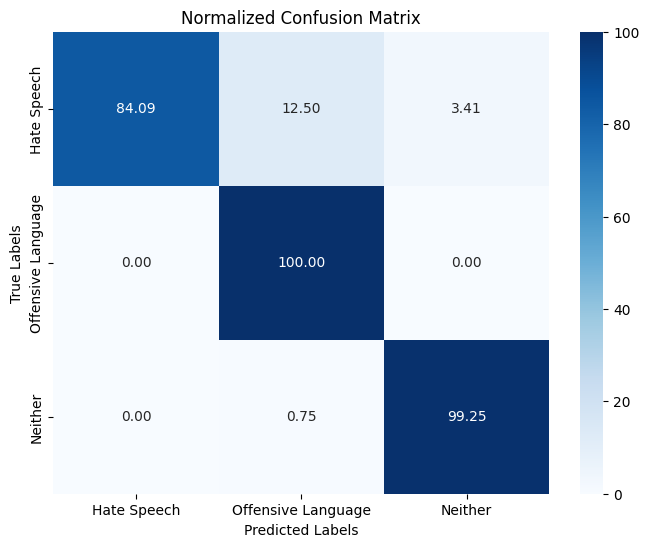

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normalized Confusion Matrix")
plt.show()